In [8]:
import csidata as cid
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('./dark.mplstyle')
import pandas as pd
cid.config.setVerbose(True)

setVerbose: True


In [9]:
# recording = '2024-09-25T15-45-38_618832' # 1ms
# recording = '2024-09-25T16-34-44_498593' # 10ms
# recording = '2024-09-25T16-39-01_840852' # 20ms
# recording = '2024-09-25T16-58-31_723389' # 50ms

# recording = '2024-09-25T17-45-53_205814' # 50ms ignore invalid payload
# recording = '2024-09-25T17-51-11_194453' # 1ms ignore invalid payload
recording = '2024-09-25T17-53-00_915754' # 1ms ignore invalid payload with camera

# recording = '2024-09-26T12-45-47_637384' # real time scheduling 1ms
# recording = '2024-10-11T16-53-18-669897_seq-iw' # prod data

In [10]:
with open(f'./2024-09-25T17-53-00_915754.txt') as f:
# with open(f'recordings/sendTimings/{recording}.txt') as f:
# with open(f'record/prod_data/sendTimings/{recording}.txt') as f:
    sendTimings = f.read().splitlines()

print(sendTimings)
    
sendTimings = list(filter(lambda s: s.split()[1].isnumeric() and len(s.split()[1]) == 16, sendTimings))
sendTimings = list(map(lambda s: s.split()[1], sendTimings))
sendTimingsDiff = np.diff(np.array(sendTimings).astype(int))
# sendTimingsDiff
len(sendTimingsDiff)

['Packet Length is: 1014,pkt_num is: 500', 'New scheduling policy: FIFO', '1, 1727279581139147', '2, 1727279581140236', '3, 1727279581141309', '4, 1727279581142354', '5, 1727279581143442', '6, 1727279581144488', '7, 1727279581145531', '8, 1727279581146574', '9, 1727279581147662', '10, 1727279581148725', '11, 1727279581149791', '12, 1727279581150877', '13, 1727279581151965', '14, 1727279581153018', '15, 1727279581154038', '16, 1727279581155126', '17, 1727279581156215', '18, 1727279581157279', '19, 1727279581158326', '20, 1727279581159415', '21, 1727279581160504', '22, 1727279581161568', '23, 1727279581162619', '24, 1727279581163707', '25, 1727279581164796', '26, 1727279581165886', '27, 1727279581166977', '28, 1727279581168067', '29, 1727279581169132', '30, 1727279581170223', '31, 1727279581171314', '32, 1727279581172405', '33, 1727279581173468', '34, 1727279581174559', '35, 1727279581175648', '36, 1727279581176740', '37, 1727279581177831', '38, 1727279581178921', '39, 1727279581180012',

499

In [11]:
recvData = cid.load(f'./{recording}.raw')
recvTimingsDiff = cid.stats.get_intervals(recvData)
# recvTimingsDiff

Detected file format: RAW_OWN
Collected 502 frames in 0.541681 seconds. Sample rate: 926.7447076785046 frames per second


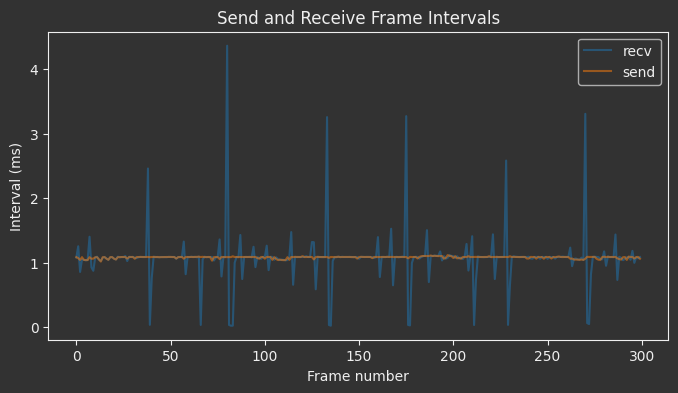

In [15]:
plt.figure(figsize=(8, 4))
plt.title(f"Send and Receive Frame Intervals")
plt.xlabel("Frame number")
plt.ylabel("Interval (ms)")

sns.lineplot(data=np.divide(recvTimingsDiff[:300], 1000), alpha=0.5, label='recv')
sns.lineplot(data=np.divide(sendTimingsDiff[:300], 1000), alpha=0.5, label = 'send')
plt.savefig(f'plots/send_recv_intervals_paper.svg', bbox_inches='tight', dpi=600, transparent=True)
plt.savefig(f'plots/send_recv_intervals_paper.png', bbox_inches='tight', dpi=600, transparent=True)
plt.show()

In [13]:
pd.value_counts([s.phyerr for s in recvData.status])

/tmp/ipykernel_80111/2713670560.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts([s.phyerr for s in recvData.status])
/tmp/ipykernel_80111/2713670560.py:1: FutureWarning: value_counts with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  pd.value_counts([s.phyerr for s in recvData.status])


0    502
Name: count, dtype: int64

<Axes: >

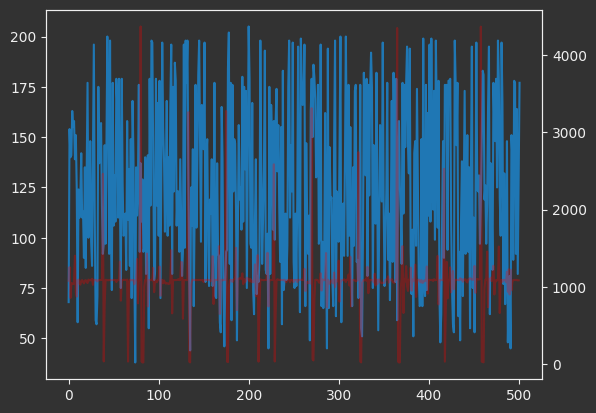

In [14]:
sns.lineplot(recvData.csi[:,0,0,0])
ax2 = plt.twinx()
sns.lineplot(recvTimingsDiff, ax=ax2, color='r', alpha=.3)